# Exploring FiveThirtyEight's Star Wars Survey

As a fun individual project, I will be analyzing FiveThirtyEight's Star Wars survey conducted before <i>Star Wars: The Force Awakens</i> was released in 2015. Their guiding question when conducting question was: does America believe <i>Star Wars: The Empire Strikes Back</i> is the best Star Wars film?

The team used SurveyMonkey to obtain their data, receiving 835 total responses. The data can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) from their repository on Github.

We'll begin by reading in the data into a pandas dataframe.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("/Users/natasharavinand/Downloads/datasets/Projects/star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We see several columns, including:

- `RespondentID`: an anonymous ID for the person taking the survey 
- `Age`: presumably the age of the respondent
- `Gender`: the gender of the respondent
- `Household Income`: total household income (given as a range) of the respondent
- `Education`: highest level of education of the respondent
- `Location`: the census region of the respondent

As well as some questions including:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?
- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
- Are you familiar with the Expanded Universe?

## Cleaning of the Data

The data was cleaned by FiveThirtyEight, but I'll be doing some extra cleaning. Because users were invited to check off boxes, the data is not easy to represent in a column format. We'll begin by removing invalid rows. 

We'll start with removing any rows with an incorrect/blank `RespondentID`.

In [83]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The two columns after `RespondentID` are:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both of these questions have only yes/no answers, but can have a NaN if a respondent chose not to answer. We'll convert these yes/no answers into `True` and `False` values so they'll be easier to work with in our analysis.

In [84]:
yes_no_map = {
    "Yes":True,
    "No":False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

Now we'll take a look at the next six columns which were answered with a single checkbox. A check meant the respondent had seen that particular film. If the value is NaN, the respondent indicated they did not see the film in question. The columns in question specifically are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Checked if the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` - Checked if the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` - Checked if the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` - Checked if the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` - Checked if the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` -Checked if the respondent saw Star Wars: Episode VI Return of the Jedi.

We'll convert these columns to boolean values so we'll be able to work with them in analysis. Additionally, we'll rename them so they're easier to call.

In [85]:
film_rename_map = {
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True,
    np.NaN:False
}

seen_rename_map = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"
}

star_wars = star_wars.rename(columns=seen_rename_map)

cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

for col in cols:
    star_wars[col] = star_wars[col].map(film_rename_map)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next, we'll move on to cleaning the ranking columns. The following columns deal with the respondents rankings of the films from least favorite (1) to most favorite (6). Some values contain NaN if the respondent declined to answer. The specific columns in question are:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - Ranking of Star Wars: Episode I The Phantom Menace
- `Unnamed: 10` - Ranking of Star Wars: Episode II Attack of the Clones
- `Unnamed: 11` - Ranking of Star Wars: Episode III Revenge of the Sith
- `Unnamed: 12` - Ranking of Star Wars: Episode IV A New Hope
- `Unnamed: 13` - Ranking of Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` - Ranking of Star Wars: Episode VI Return of the Jedi

We'll convert each of these columns to a numeric type (float) and then rename them so it is easier to call them.

In [151]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

rank_rename_map = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":\
    "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

star_wars = star_wars.rename(columns=rank_rename_map)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Simple Analysis of the Data

Now that we have cleaned most of the data, we can run some simple analysis to collect inferences about the data. We'll begin by finding the highest-ranked movies and plotting our findings.

In [143]:
ranking_cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
avg_rankings = star_wars.mean()[ranking_cols]
print("Average Rankings of Movies\n",avg_rankings)

Average Rankings of Movies
 ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


Text(0.5, 1.0, "Average of Respondents' Ranking of Movies")

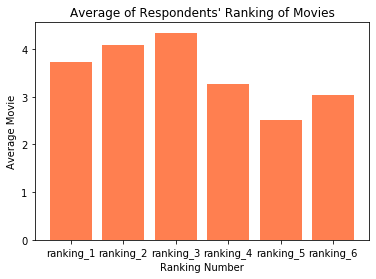

In [100]:
plt.bar(ranking_cols, avg_rankings, color='coral')
plt.xlabel("Ranking Number")
plt.ylabel("Average Movie")
plt.title("Average of Respondents' Ranking of Movies")

We can see that <i>Star Wars: Episode IV A New Hope</i> seems to be a favorite, with `ranking_1` and `ranking_2` seem to be averaging near 4, or our indicator for <i>A New Hope</i>. This seems to suggest an overall favor for the old trilogy released in the 1970s/1980s. The more lower rated films tend towards the <i>Star Wars: Episode II Attack of the Clones</i> and <i>Star Wars: Episode III Revenge of the Sith</i> films, both of which were not received with much critical or fan acclaim.

Next, we'll analyze how many people have seen each movie.

Text(0, 0.5, 'Frequency')

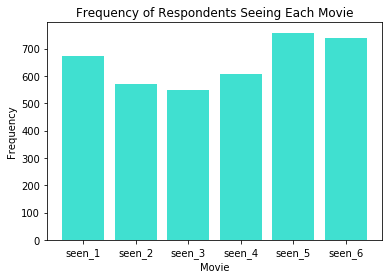

In [119]:
seen_sums = star_wars.iloc[:,3:9].sum()
seen_columns = star_wars.columns[3:9]
plt.bar(seen_columns, seen_sums, color='turquoise')
plt.title("Frequency of Respondents Seeing Each Movie")
plt.xlabel("Movie")
plt.ylabel("Frequency")

It seems like <i>Star Wars: Episode V The Empire Strikes Back</i> and <i>Star Wars: Episode VI Return of the Jedi</i> were seen by most respondents, possibly because they have been among the best reviewed films of the series. It seems like the lowest number of respondents had seen <i>Star Wars: Episode II Attack of the Clones</i> and <i>Star Wars: Episode III Revenge of the Sith</i>, possibly because they are among the lowest rated films in the series. It appears that <i>Star Wars: Episode I The Phantom Menace</i> garnered many views in the sample despite its lower ratings, but this may because of the anticipation of a new Star Wars release after <i>Star Wars: Episode VI Return of the Jedi</i>.

Next, we'll look at how certain segments of our sample population responded to some questions. The following columns:

- `Gender`: Male or Female
- `Do you consider yourself to be a fan of the Star Wars film franchise?`: True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?`: Yes or No

segment our population into one of two halves. We'll take a look at gender specifically to find the most viewed movie and highest-ranked movie between genders. 

In [142]:
females = star_wars[star_wars['Gender'] == 'Female']
males = star_wars[star_wars['Gender'] == 'Male']

fem_avg_rankings = females.mean()[ranking_cols]
male_avg_rankings = males.mean()[ranking_cols]

print("Average Ratings from Female Group:\n",fem_avg_rankings,"\n")
print("Average Ratings from Male Group:\n", male_avg_rankings)

Average Ratings from Female Group:
 ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64 

Average Ratings from Male Group:
 ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


It seems that both genders rank <i>Revenge of the Sith</i> in the last ranking. The male group, however, seems so show a strong bias to <i>A New Hope</i> in the upper rankings while the female group's bias is slightly less strong, albeit there. We'll now depict these graphically.

Text(0.5, 1.0, 'Average Ranking for Female Respondents')

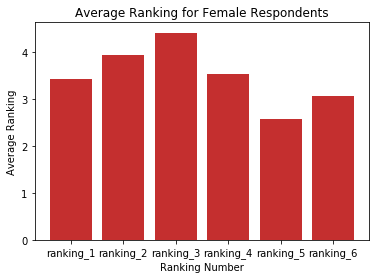

In [128]:
plt.bar(ranking_cols, fem_avg_rankings, color='#c42f2f')
plt.xlabel("Ranking Number")
plt.ylabel("Average Ranking")
plt.title("Average Ranking for Female Respondents")

Text(0.5, 1.0, 'Average Ranking for Male Respondents')

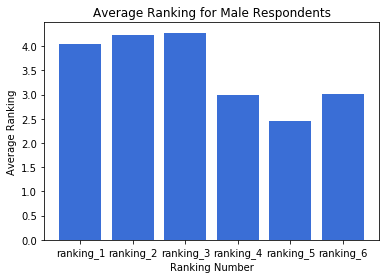

In [131]:
plt.bar(ranking_cols, male_avg_rankings, color='#3a6ed6')
plt.xlabel("Ranking Number")
plt.ylabel("Average Ranking")
plt.title("Average Ranking for Male Respondents")

Next, we'll try to find the most viewed movie between the genders and plot our findings.

In [145]:
fem_seen_sums = females.iloc[:,3:9].sum()
male_seen_sums = males.iloc[:,3:9].sum()

print("Frequency of Movies Seen for Female Group\n",fem_seen_sums, "\n")
print("Frequency of Movies Seen for Male Group\n",male_seen_sums)

Frequency of Movies Seen for Female Group
 seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64 

Frequency of Movies Seen for Male Group
 seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


Text(0, 0.5, 'Frequency')

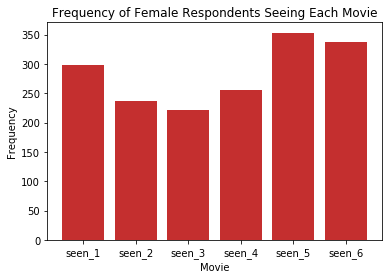

In [150]:
plt.bar(seen_columns, fem_seen_sums, color='#c42f2f')
plt.title("Frequency of Female Respondents Seeing Each Movie")
plt.xlabel("Movie")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

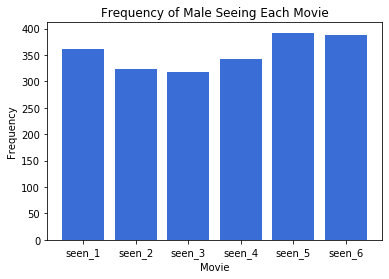

In [149]:
plt.bar(seen_columns, male_seen_sums, color='#3a6ed6')
plt.title("Frequency of Male Seeing Each Movie")
plt.xlabel("Movie")
plt.ylabel("Frequency")

It seems that men and women both shared <i>The Empire Strikes Back</i> as the most viewed movie. If our sample is representative of the total population, this could be an indicator of why <i>The Empire Strikes Back</i> is garnered as the "best" film of them all.